In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau

import matplotlib.pyplot as plt
import numpy as np

from deepr import *

from trainer import *

import pickle


print("Feedforward ANN with deep R, Trained on MNIST")

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Training Parameters
batch_size=128 # big batch size needed otherwise training loss histogram is noisy; helps with deepr aswell
data_path='./tmp/data/mnist'
num_classes = 10  # MNIST has 10 output classes

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)

# # temporary dataloader if MNIST service is unavailable
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz

# mnist_train = datasets.MNIST(root = './', train=True, download=True, transform=transform)
# mnist_test = datasets.MNIST(root = './', train=False, download=True, transform=transform)

train_sampler = torch.utils.data.RandomSampler(mnist_train, generator=gtrain,replacement=False)
test_sampler = torch.utils.data.RandomSampler(mnist_test, generator=gtest,replacement=False)

# # temporary dataloader if MNIST service is unavailable
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=False,drop_last=False,pin_memory=True,sampler=train_sampler,num_workers=1)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False,drop_last=False,pin_memory=True,sampler=test_sampler,num_workers=1)

############ MNIST Model ################################

# layer parameters
num_inputs = 28*28
num_hidden1 = 300   
num_hidden2 = 100
num_outputs = 10

lr=1e-2

class Net(nn.Module):

    def __init__(self,c = None):
        super().__init__()

        self.loss = nn.CrossEntropyLoss()
        self.accuracy_metric = lambda logits, targets: (torch.argmax(logits,dim=1) == targets).sum().item() / targets.size(0)

        self.linears = nn.ModuleList([
            nn.Linear(num_inputs, num_hidden1),
            nn.Linear(num_hidden1, num_hidden2),
            nn.Linear(num_hidden2, num_outputs)
        ])

        

        self.neurons = nn.ModuleList([
            nn.ReLU(),
            nn.ReLU(),
            nn.ReLU()
        ])

        self.to(device)
        if c is not None:
            self.deepr = DeepR(self.linears,lr,[0,1,2],connectivity=c,device=device)
        
    def forward(self,x):
        x=x.view(x.size(0), -1)
        
        x = self.linears[0](x)
        x = self.neurons[0](x)
        x = self.linears[1](x)
        x = self.neurons[1](x)
        x = self.linears[2](x)

        return x

Feedforward ANN with deep R, Trained on MNIST


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.17
Validation accuracy: 28.12%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 0.39
Validation loss: 0.46
Validation accuracy: 86.72%
Training accuracy: 89.84%
----------------
Iteration: 100
Training loss: 0.17
Validation loss: 0.18
Validation accuracy: 96.88%
Training accuracy: 94.53%
----------------
Iteration: 150
Training loss: 0.26
Validation loss: 0.31
Validation accuracy: 91.41%
Training accuracy: 90.62%
----------------
Iteration: 200
Training loss: 0.22
Validation loss: 0.21
Validation accuracy: 93.75%
Training accuracy: 92.97%
----------------
Iteration: 250
Training loss: 0.14
Validation loss: 0.09
Validation accuracy: 96.09%
Training accuracy: 95.31%
----------------
Iteration: 300
Training loss: 0.12
Validation loss: 0.13
Validation accuracy: 98.44%
Training accuracy: 95.31%
----------------
Iteration: 350
Training loss: 0.20
Validation loss: 0.21
Validation accuracy: 95.31%
Training accuracy: 93.

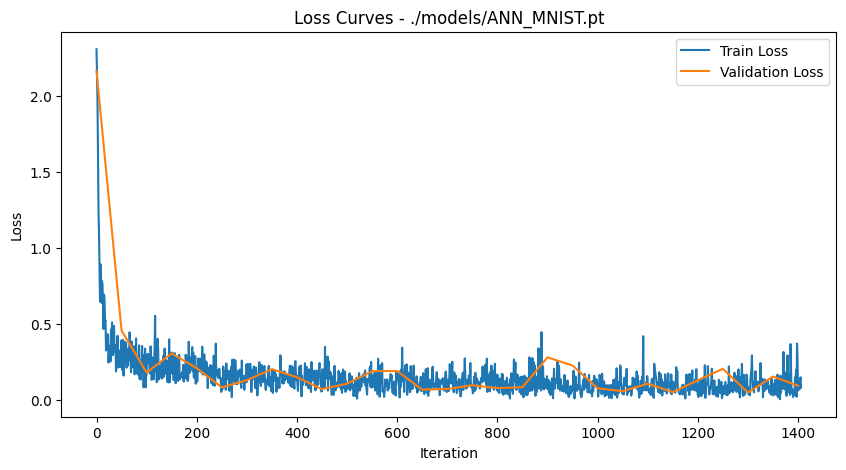

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 96.77%
----


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.23
Validation accuracy: 21.88%
Training accuracy: 7.81%
----------------
Iteration: 50
Training loss: 0.36
Validation loss: 0.44
Validation accuracy: 85.16%
Training accuracy: 88.28%
----------------
Iteration: 100
Training loss: 0.15
Validation loss: 0.15
Validation accuracy: 96.88%
Training accuracy: 94.53%
----------------
Iteration: 150
Training loss: 0.26
Validation loss: 0.23
Validation accuracy: 93.75%
Training accuracy: 92.97%
----------------
Iteration: 200
Training loss: 0.23
Validation loss: 0.18
Validation accuracy: 93.75%
Training accuracy: 91.41%
----------------
Iteration: 250
Training loss: 0.16
Validation loss: 0.08
Validation accuracy: 96.88%
Training accuracy: 95.31%
----------------
Iteration: 300
Training loss: 0.14
Validation loss: 0.09
Validation accuracy: 97.66%
Training accuracy: 92.97%
----------------
Iteration: 350
Training loss: 0.19
Validation loss: 0.18
Validation accuracy: 95.31%
Training accuracy: 94.5

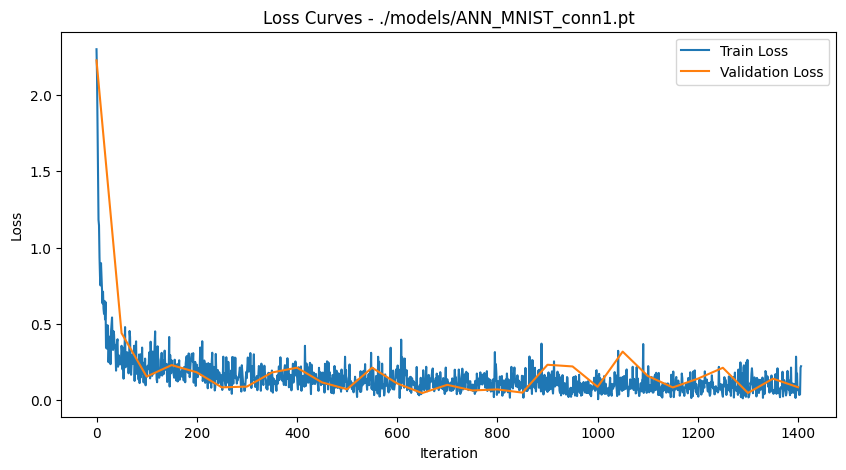

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 96.35%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.23
Validation accuracy: 29.69%
Training accuracy: 9.38%
----------------
Iteration: 50
Training loss: 0.49
Validation loss: 0.45
Validation accuracy: 82.81%
Training accuracy: 84.38%
----------------
Iteration: 100
Training loss: 0.14
Validation loss: 0.18
Validation accuracy: 95.31%
Training accuracy: 95.31%
----------------
Iteration: 150
Training loss: 0.28
Validation loss: 0.26
Validation accuracy: 94.53%
Training accuracy: 92.19%
----------------
Iteration: 200
Training loss: 0.27
Validation loss: 0.16
Validation accuracy: 94.53%
Training accuracy: 92.97%
----------------
Iteration: 250
Training loss: 0.16
Validation loss: 0.08
Validation accuracy: 96.88%
Training accuracy: 94.53%
----------------
Iteration: 300
Training loss: 0.15
Validation loss: 0.10
Validation accuracy: 98.44%
Training accuracy: 92.97%
----------------
Iteration: 350
Training loss: 0.20
Validation loss: 0.20
Validation accuracy: 93.75%
Training accuracy: 94.5

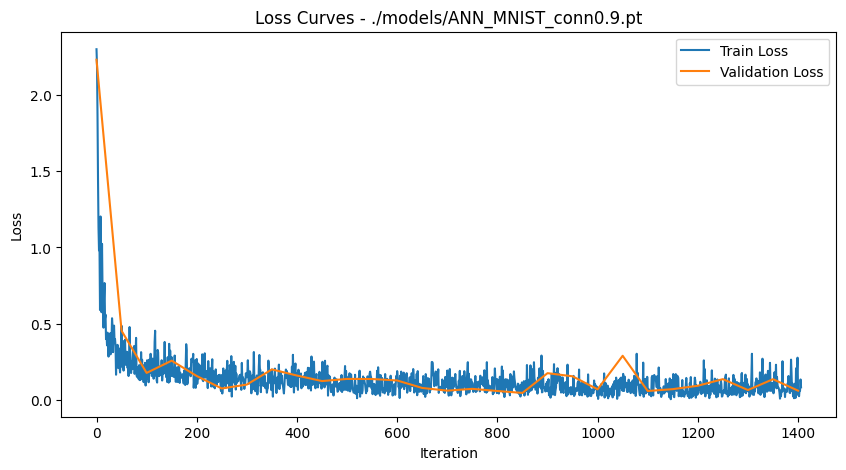

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 96.86%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.22
Validation accuracy: 15.62%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 0.44
Validation loss: 0.45
Validation accuracy: 85.16%
Training accuracy: 85.16%
----------------
Iteration: 100
Training loss: 0.13
Validation loss: 0.19
Validation accuracy: 95.31%
Training accuracy: 95.31%
----------------
Iteration: 150
Training loss: 0.28
Validation loss: 0.24
Validation accuracy: 92.19%
Training accuracy: 92.19%
----------------
Iteration: 200
Training loss: 0.21
Validation loss: 0.20
Validation accuracy: 92.19%
Training accuracy: 93.75%
----------------
Iteration: 250
Training loss: 0.13
Validation loss: 0.05
Validation accuracy: 97.66%
Training accuracy: 95.31%
----------------
Iteration: 300
Training loss: 0.13
Validation loss: 0.15
Validation accuracy: 94.53%
Training accuracy: 92.97%
----------------
Iteration: 350
Training loss: 0.16
Validation loss: 0.15
Validation accuracy: 96.09%
Training accuracy: 94.

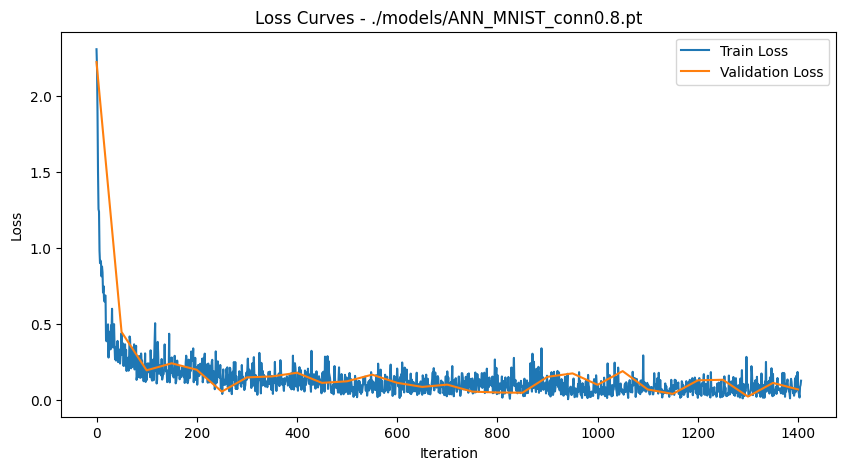

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.01%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.23
Validation accuracy: 13.28%
Training accuracy: 11.72%
----------------
Iteration: 50
Training loss: 0.47
Validation loss: 0.46
Validation accuracy: 83.59%
Training accuracy: 84.38%
----------------
Iteration: 100
Training loss: 0.15
Validation loss: 0.18
Validation accuracy: 96.88%
Training accuracy: 93.75%
----------------
Iteration: 150
Training loss: 0.28
Validation loss: 0.30
Validation accuracy: 92.97%
Training accuracy: 91.41%
----------------
Iteration: 200
Training loss: 0.22
Validation loss: 0.17
Validation accuracy: 94.53%
Training accuracy: 92.19%
----------------
Iteration: 250
Training loss: 0.16
Validation loss: 0.07
Validation accuracy: 98.44%
Training accuracy: 94.53%
----------------
Iteration: 300
Training loss: 0.13
Validation loss: 0.09
Validation accuracy: 96.88%
Training accuracy: 94.53%
----------------
Iteration: 350
Training loss: 0.20
Validation loss: 0.19
Validation accuracy: 93.75%
Training accuracy: 92.

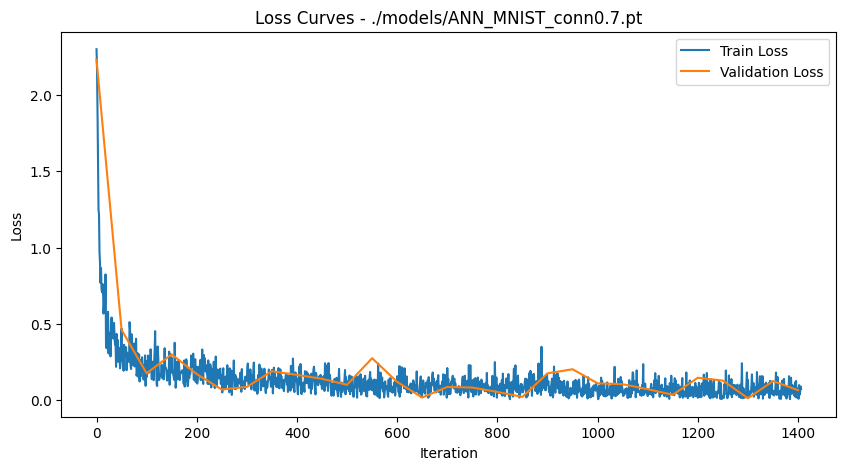

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.25%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.24
Validation accuracy: 15.62%
Training accuracy: 10.16%
----------------
Iteration: 50
Training loss: 0.46
Validation loss: 0.43
Validation accuracy: 82.81%
Training accuracy: 88.28%
----------------
Iteration: 100
Training loss: 0.15
Validation loss: 0.17
Validation accuracy: 96.09%
Training accuracy: 95.31%
----------------
Iteration: 150
Training loss: 0.27
Validation loss: 0.29
Validation accuracy: 91.41%
Training accuracy: 92.19%
----------------
Iteration: 200
Training loss: 0.24
Validation loss: 0.13
Validation accuracy: 97.66%
Training accuracy: 92.19%
----------------
Iteration: 250
Training loss: 0.13
Validation loss: 0.06
Validation accuracy: 99.22%
Training accuracy: 96.09%
----------------
Iteration: 300
Training loss: 0.16
Validation loss: 0.12
Validation accuracy: 96.88%
Training accuracy: 92.97%
----------------
Iteration: 350
Training loss: 0.22
Validation loss: 0.20
Validation accuracy: 94.53%
Training accuracy: 94.

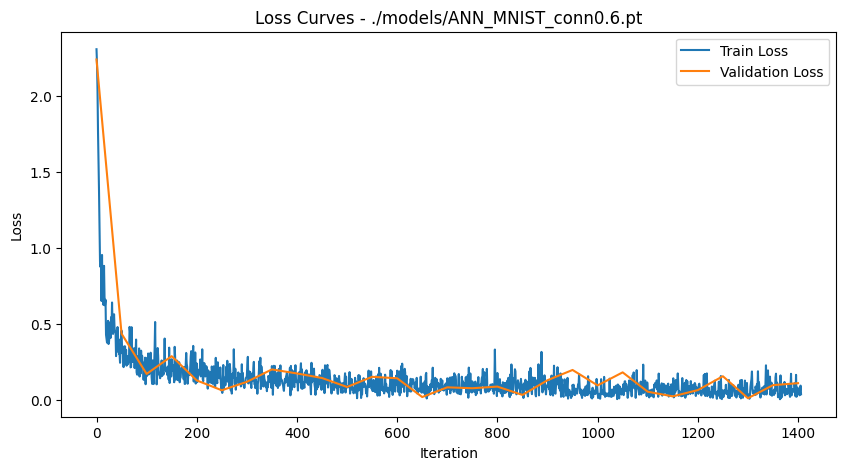

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.38%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.27
Validation accuracy: 21.09%
Training accuracy: 11.72%
----------------
Iteration: 50
Training loss: 0.58
Validation loss: 0.52
Validation accuracy: 84.38%
Training accuracy: 80.47%
----------------
Iteration: 100
Training loss: 0.14
Validation loss: 0.21
Validation accuracy: 94.53%
Training accuracy: 95.31%
----------------
Iteration: 150
Training loss: 0.28
Validation loss: 0.21
Validation accuracy: 96.09%
Training accuracy: 92.19%
----------------
Iteration: 200
Training loss: 0.27
Validation loss: 0.18
Validation accuracy: 93.75%
Training accuracy: 89.84%
----------------
Iteration: 250
Training loss: 0.17
Validation loss: 0.08
Validation accuracy: 98.44%
Training accuracy: 94.53%
----------------
Iteration: 300
Training loss: 0.18
Validation loss: 0.10
Validation accuracy: 97.66%
Training accuracy: 92.19%
----------------
Iteration: 350
Training loss: 0.21
Validation loss: 0.17
Validation accuracy: 93.75%
Training accuracy: 94.

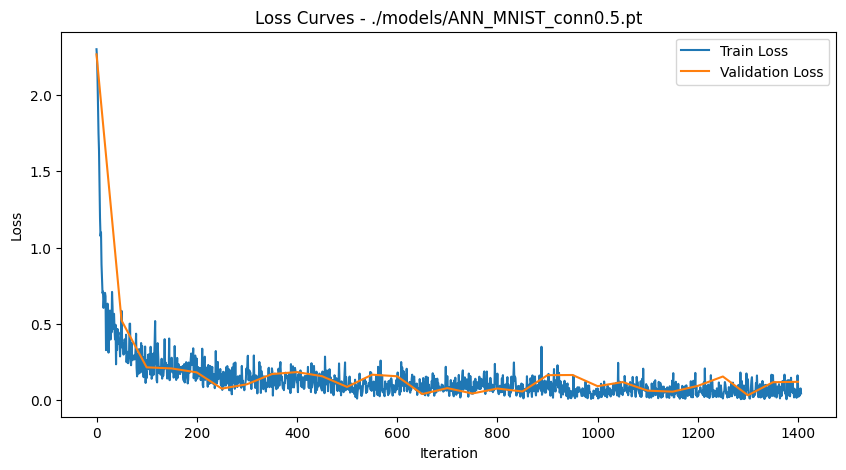

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.75%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.28
Validation accuracy: 14.84%
Training accuracy: 10.16%
----------------
Iteration: 50
Training loss: 0.53
Validation loss: 0.46
Validation accuracy: 84.38%
Training accuracy: 82.81%
----------------
Iteration: 100
Training loss: 0.18
Validation loss: 0.20
Validation accuracy: 95.31%
Training accuracy: 94.53%
----------------
Iteration: 150
Training loss: 0.33
Validation loss: 0.25
Validation accuracy: 93.75%
Training accuracy: 91.41%
----------------
Iteration: 200
Training loss: 0.24
Validation loss: 0.16
Validation accuracy: 96.09%
Training accuracy: 90.62%
----------------
Iteration: 250
Training loss: 0.18
Validation loss: 0.08
Validation accuracy: 97.66%
Training accuracy: 94.53%
----------------
Iteration: 300
Training loss: 0.16
Validation loss: 0.10
Validation accuracy: 96.88%
Training accuracy: 92.97%
----------------
Iteration: 350
Training loss: 0.22
Validation loss: 0.20
Validation accuracy: 95.31%
Training accuracy: 92.

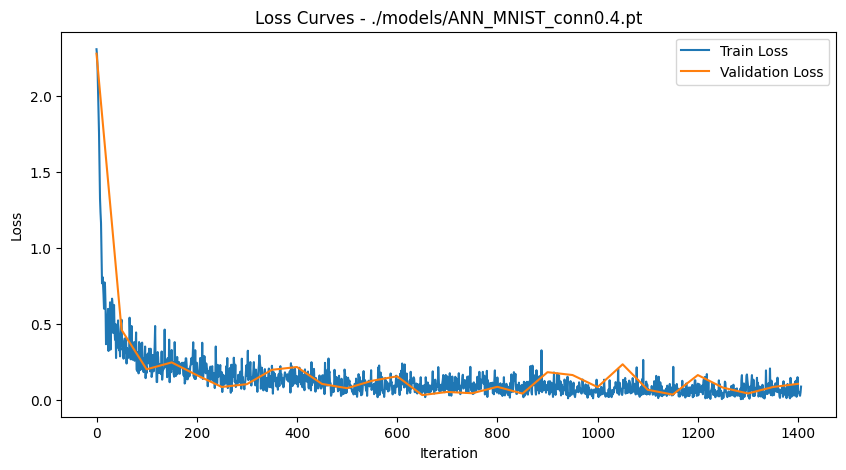

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.29%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.30
Validation accuracy: 10.16%
Training accuracy: 11.72%
----------------
Iteration: 50
Training loss: 0.57
Validation loss: 0.51
Validation accuracy: 85.16%
Training accuracy: 82.81%
----------------
Iteration: 100
Training loss: 0.20
Validation loss: 0.19
Validation accuracy: 96.88%
Training accuracy: 93.75%
----------------
Iteration: 150
Training loss: 0.33
Validation loss: 0.31
Validation accuracy: 91.41%
Training accuracy: 91.41%
----------------
Iteration: 200
Training loss: 0.29
Validation loss: 0.24
Validation accuracy: 95.31%
Training accuracy: 90.62%
----------------
Iteration: 250
Training loss: 0.18
Validation loss: 0.09
Validation accuracy: 97.66%
Training accuracy: 94.53%
----------------
Iteration: 300
Training loss: 0.20
Validation loss: 0.13
Validation accuracy: 96.09%
Training accuracy: 91.41%
----------------
Iteration: 350
Training loss: 0.20
Validation loss: 0.18
Validation accuracy: 96.09%
Training accuracy: 94.

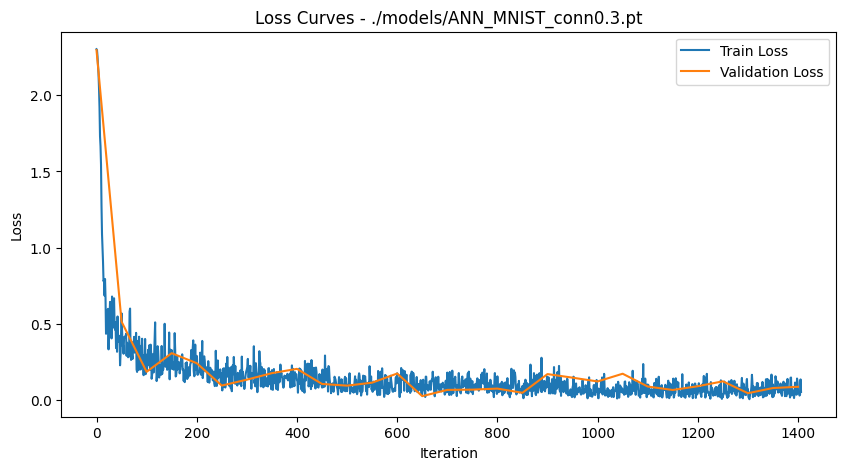

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 97.36%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.30
Validation accuracy: 9.38%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 0.48
Validation loss: 0.60
Validation accuracy: 85.16%
Training accuracy: 87.50%
----------------
Iteration: 100
Training loss: 0.25
Validation loss: 0.21
Validation accuracy: 96.09%
Training accuracy: 92.19%
----------------
Iteration: 150
Training loss: 0.42
Validation loss: 0.37
Validation accuracy: 88.28%
Training accuracy: 87.50%
----------------
Iteration: 200
Training loss: 0.29
Validation loss: 0.31
Validation accuracy: 92.19%
Training accuracy: 90.62%
----------------
Iteration: 250
Training loss: 0.22
Validation loss: 0.13
Validation accuracy: 96.09%
Training accuracy: 92.19%
----------------
Iteration: 300
Training loss: 0.25
Validation loss: 0.16
Validation accuracy: 95.31%
Training accuracy: 90.62%
----------------
Iteration: 350
Training loss: 0.26
Validation loss: 0.22
Validation accuracy: 92.19%
Training accuracy: 94.5

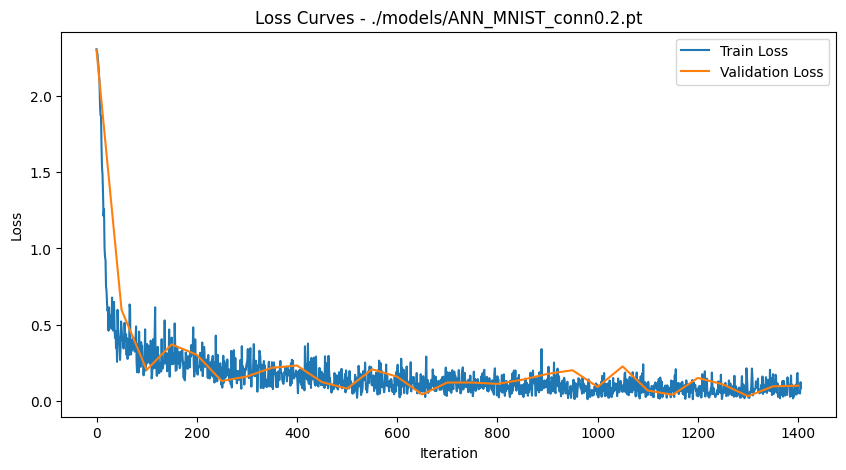

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 96.90%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.31
Validation accuracy: 9.38%
Training accuracy: 10.94%
----------------
Iteration: 50
Training loss: 0.50
Validation loss: 0.59
Validation accuracy: 85.16%
Training accuracy: 83.59%
----------------
Iteration: 100
Training loss: 0.26
Validation loss: 0.23
Validation accuracy: 92.97%
Training accuracy: 92.97%
----------------
Iteration: 150
Training loss: 0.47
Validation loss: 0.42
Validation accuracy: 86.72%
Training accuracy: 88.28%
----------------
Iteration: 200
Training loss: 0.36
Validation loss: 0.35
Validation accuracy: 90.62%
Training accuracy: 87.50%
----------------
Iteration: 250
Training loss: 0.26
Validation loss: 0.17
Validation accuracy: 96.09%
Training accuracy: 92.97%
----------------
Iteration: 300
Training loss: 0.32
Validation loss: 0.22
Validation accuracy: 95.31%
Training accuracy: 88.28%
----------------
Iteration: 350
Training loss: 0.31
Validation loss: 0.26
Validation accuracy: 91.41%
Training accuracy: 94.5

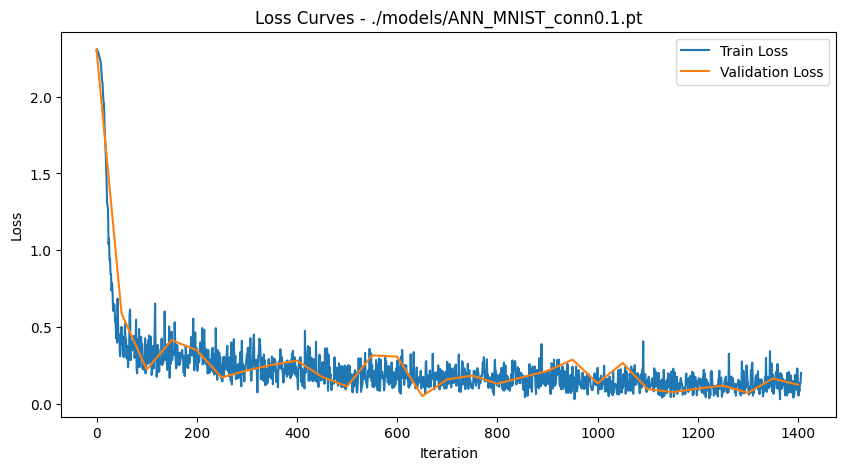

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 96.29%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.31
Validation accuracy: 9.38%
Training accuracy: 11.72%
----------------
Iteration: 50
Training loss: 0.52
Validation loss: 0.71
Validation accuracy: 82.03%
Training accuracy: 80.47%
----------------
Iteration: 100
Training loss: 0.28
Validation loss: 0.25
Validation accuracy: 94.53%
Training accuracy: 91.41%
----------------
Iteration: 150
Training loss: 0.49
Validation loss: 0.45
Validation accuracy: 89.84%
Training accuracy: 88.28%
----------------
Iteration: 200
Training loss: 0.32
Validation loss: 0.31
Validation accuracy: 92.19%
Training accuracy: 88.28%
----------------
Iteration: 250
Training loss: 0.30
Validation loss: 0.19
Validation accuracy: 95.31%
Training accuracy: 89.84%
----------------
Iteration: 300
Training loss: 0.30
Validation loss: 0.22
Validation accuracy: 93.75%
Training accuracy: 89.84%
----------------
Iteration: 350
Training loss: 0.36
Validation loss: 0.26
Validation accuracy: 89.84%
Training accuracy: 92.1

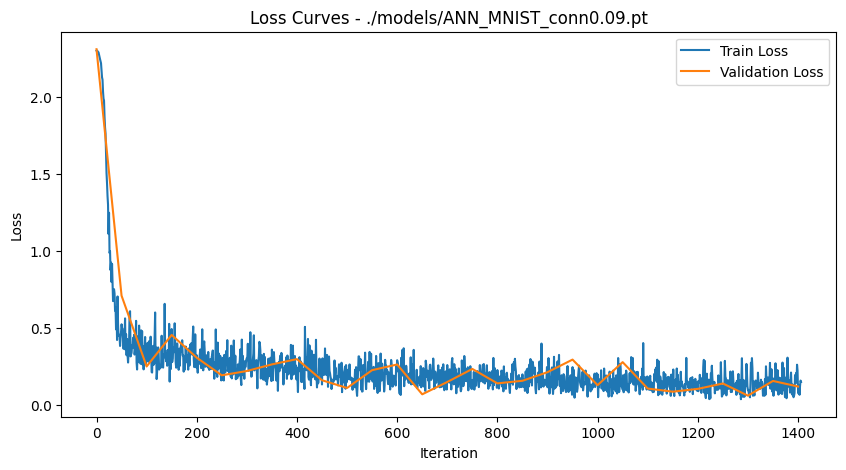

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 95.49%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.29
Validation loss: 2.31
Validation accuracy: 9.38%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 0.53
Validation loss: 0.61
Validation accuracy: 82.03%
Training accuracy: 83.59%
----------------
Iteration: 100
Training loss: 0.28
Validation loss: 0.26
Validation accuracy: 93.75%
Training accuracy: 92.19%
----------------
Iteration: 150
Training loss: 0.49
Validation loss: 0.45
Validation accuracy: 88.28%
Training accuracy: 89.06%
----------------
Iteration: 200
Training loss: 0.34
Validation loss: 0.32
Validation accuracy: 91.41%
Training accuracy: 87.50%
----------------
Iteration: 250
Training loss: 0.29
Validation loss: 0.16
Validation accuracy: 95.31%
Training accuracy: 92.97%
----------------
Iteration: 300
Training loss: 0.37
Validation loss: 0.24
Validation accuracy: 92.97%
Training accuracy: 89.06%
----------------
Iteration: 350
Training loss: 0.30
Validation loss: 0.28
Validation accuracy: 92.19%
Training accuracy: 92.9

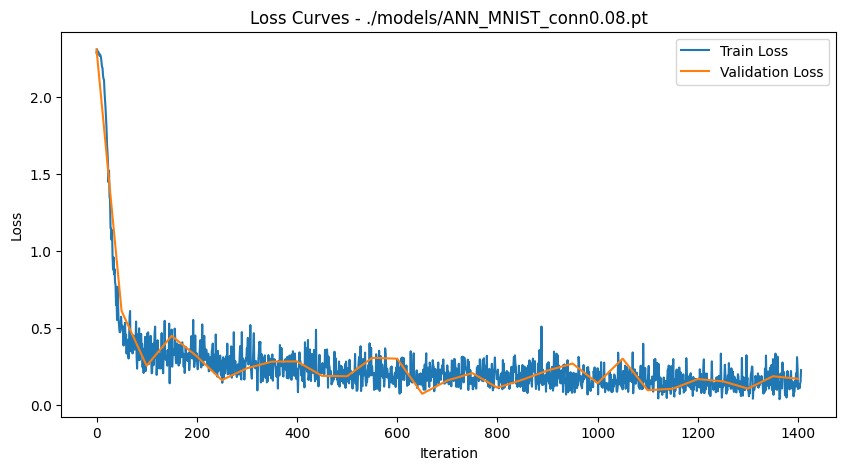

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 95.24%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.31
Validation accuracy: 9.38%
Training accuracy: 11.72%
----------------
Iteration: 50
Training loss: 0.65
Validation loss: 0.75
Validation accuracy: 78.91%
Training accuracy: 75.78%
----------------
Iteration: 100
Training loss: 0.32
Validation loss: 0.27
Validation accuracy: 93.75%
Training accuracy: 91.41%
----------------
Iteration: 150
Training loss: 0.42
Validation loss: 0.48
Validation accuracy: 89.06%
Training accuracy: 90.62%
----------------
Iteration: 200
Training loss: 0.38
Validation loss: 0.31
Validation accuracy: 89.84%
Training accuracy: 88.28%
----------------
Iteration: 250
Training loss: 0.36
Validation loss: 0.17
Validation accuracy: 95.31%
Training accuracy: 89.06%
----------------
Iteration: 300
Training loss: 0.33
Validation loss: 0.23
Validation accuracy: 92.97%
Training accuracy: 90.62%
----------------
Iteration: 350
Training loss: 0.30
Validation loss: 0.29
Validation accuracy: 89.84%
Training accuracy: 94.5

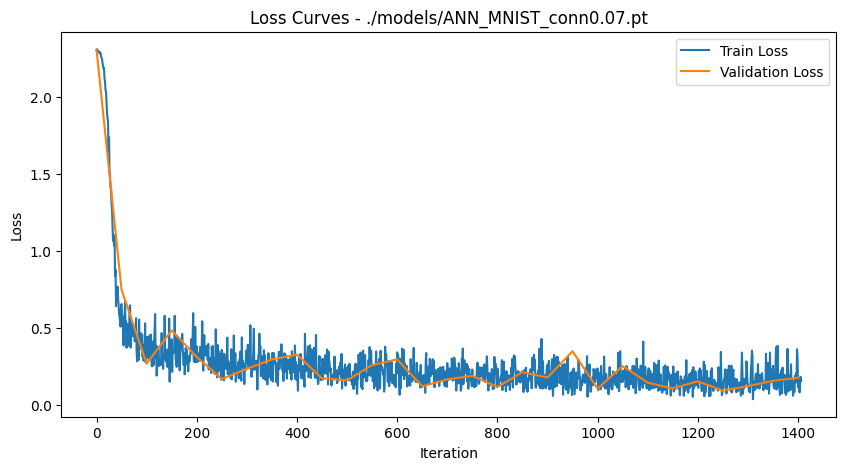

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 95.56%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.30
Validation accuracy: 9.38%
Training accuracy: 8.59%
----------------
Iteration: 50
Training loss: 0.77
Validation loss: 0.80
Validation accuracy: 76.56%
Training accuracy: 77.34%
----------------
Iteration: 100
Training loss: 0.32
Validation loss: 0.28
Validation accuracy: 92.97%
Training accuracy: 87.50%
----------------
Iteration: 150
Training loss: 0.46
Validation loss: 0.46
Validation accuracy: 87.50%
Training accuracy: 86.72%
----------------
Iteration: 200
Training loss: 0.43
Validation loss: 0.38
Validation accuracy: 89.84%
Training accuracy: 89.06%
----------------
Iteration: 250
Training loss: 0.31
Validation loss: 0.19
Validation accuracy: 95.31%
Training accuracy: 92.19%
----------------
Iteration: 300
Training loss: 0.32
Validation loss: 0.26
Validation accuracy: 89.84%
Training accuracy: 89.84%
----------------
Iteration: 350
Training loss: 0.38
Validation loss: 0.33
Validation accuracy: 89.84%
Training accuracy: 92.19

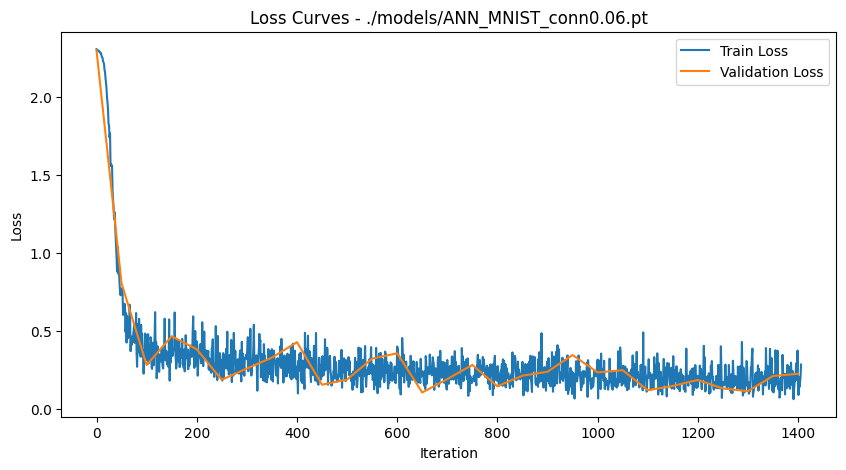

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 94.31%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.31
Validation loss: 2.30
Validation accuracy: 10.16%
Training accuracy: 7.03%
----------------
Iteration: 50
Training loss: 0.76
Validation loss: 0.83
Validation accuracy: 78.91%
Training accuracy: 73.44%
----------------
Iteration: 100
Training loss: 0.37
Validation loss: 0.35
Validation accuracy: 89.84%
Training accuracy: 87.50%
----------------
Iteration: 150
Training loss: 0.53
Validation loss: 0.49
Validation accuracy: 86.72%
Training accuracy: 85.16%
----------------
Iteration: 200
Training loss: 0.40
Validation loss: 0.35
Validation accuracy: 89.06%
Training accuracy: 88.28%
----------------
Iteration: 250
Training loss: 0.34
Validation loss: 0.22
Validation accuracy: 96.09%
Training accuracy: 90.62%
----------------
Iteration: 300
Training loss: 0.36
Validation loss: 0.26
Validation accuracy: 92.19%
Training accuracy: 89.06%
----------------
Iteration: 350
Training loss: 0.34
Validation loss: 0.40
Validation accuracy: 87.50%
Training accuracy: 93.7

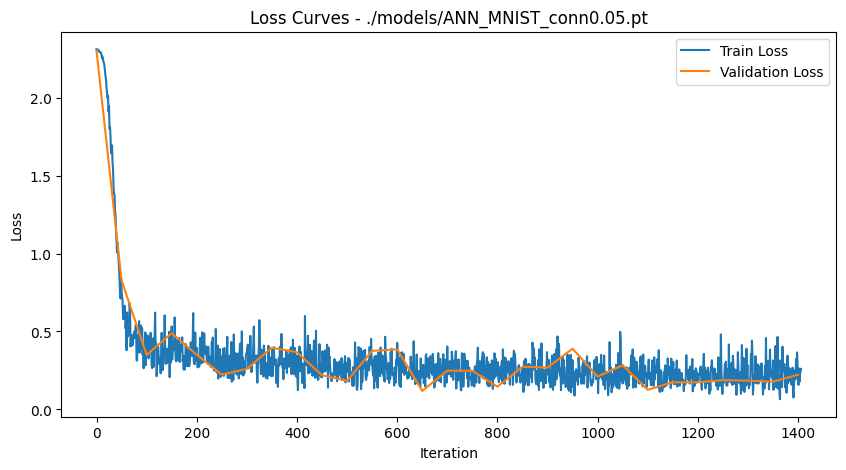

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 93.83%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.31
Validation accuracy: 8.59%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 1.38
Validation loss: 1.31
Validation accuracy: 57.81%
Training accuracy: 53.91%
----------------
Iteration: 100
Training loss: 0.51
Validation loss: 0.60
Validation accuracy: 82.03%
Training accuracy: 85.94%
----------------
Iteration: 150
Training loss: 0.61
Validation loss: 0.55
Validation accuracy: 86.72%
Training accuracy: 81.25%
----------------
Iteration: 200
Training loss: 0.47
Validation loss: 0.54
Validation accuracy: 86.72%
Training accuracy: 87.50%
----------------
Iteration: 250
Training loss: 0.47
Validation loss: 0.32
Validation accuracy: 92.19%
Training accuracy: 85.16%
----------------
Iteration: 300
Training loss: 0.44
Validation loss: 0.33
Validation accuracy: 88.28%
Training accuracy: 88.28%
----------------
Iteration: 350
Training loss: 0.42
Validation loss: 0.42
Validation accuracy: 85.16%
Training accuracy: 89.8

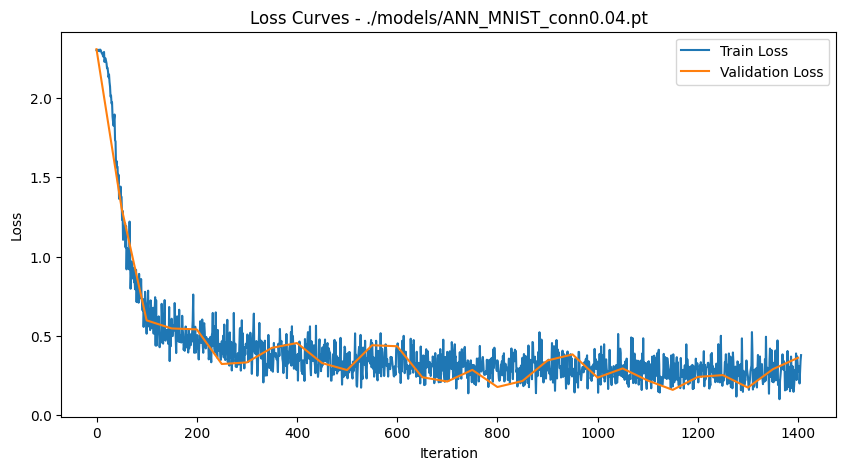

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 92.60%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.30
Validation accuracy: 9.38%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 1.75
Validation loss: 1.67
Validation accuracy: 44.53%
Training accuracy: 46.09%
----------------
Iteration: 100
Training loss: 0.81
Validation loss: 0.88
Validation accuracy: 67.19%
Training accuracy: 77.34%
----------------
Iteration: 150
Training loss: 0.92
Validation loss: 0.78
Validation accuracy: 77.34%
Training accuracy: 72.66%
----------------
Iteration: 200
Training loss: 0.73
Validation loss: 0.77
Validation accuracy: 74.22%
Training accuracy: 78.12%
----------------
Iteration: 250
Training loss: 0.74
Validation loss: 0.52
Validation accuracy: 81.25%
Training accuracy: 75.00%
----------------
Iteration: 300
Training loss: 0.73
Validation loss: 0.63
Validation accuracy: 80.47%
Training accuracy: 74.22%
----------------
Iteration: 350
Training loss: 0.57
Validation loss: 0.72
Validation accuracy: 76.56%
Training accuracy: 80.4

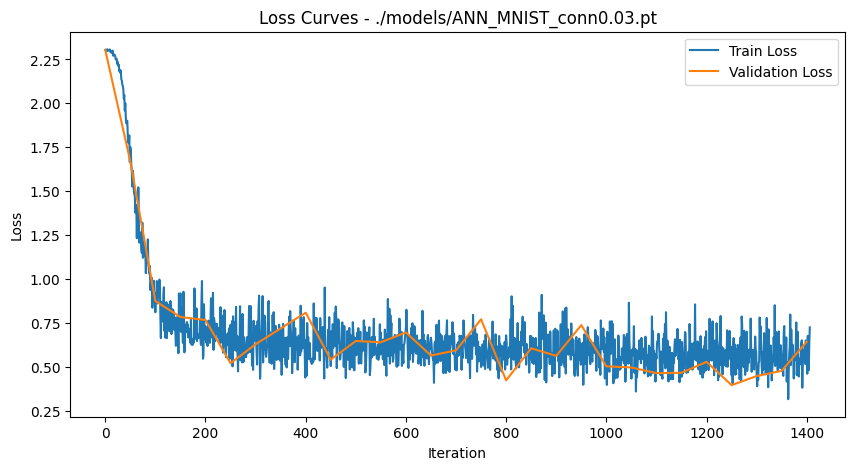

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 79.97%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.29
Validation loss: 2.31
Validation accuracy: 9.38%
Training accuracy: 12.50%
----------------
Iteration: 50
Training loss: 2.24
Validation loss: 2.22
Validation accuracy: 17.97%
Training accuracy: 21.09%
----------------
Iteration: 100
Training loss: 2.00
Validation loss: 2.02
Validation accuracy: 22.66%
Training accuracy: 29.69%
----------------
Iteration: 150
Training loss: 2.02
Validation loss: 2.02
Validation accuracy: 21.09%
Training accuracy: 25.78%
----------------
Iteration: 200
Training loss: 1.96
Validation loss: 2.04
Validation accuracy: 28.12%
Training accuracy: 21.09%
----------------
Iteration: 250
Training loss: 1.91
Validation loss: 1.82
Validation accuracy: 32.81%
Training accuracy: 25.78%
----------------
Iteration: 300
Training loss: 1.95
Validation loss: 1.98
Validation accuracy: 28.12%
Training accuracy: 25.00%
----------------
Iteration: 350
Training loss: 1.99
Validation loss: 1.99
Validation accuracy: 24.22%
Training accuracy: 23.4

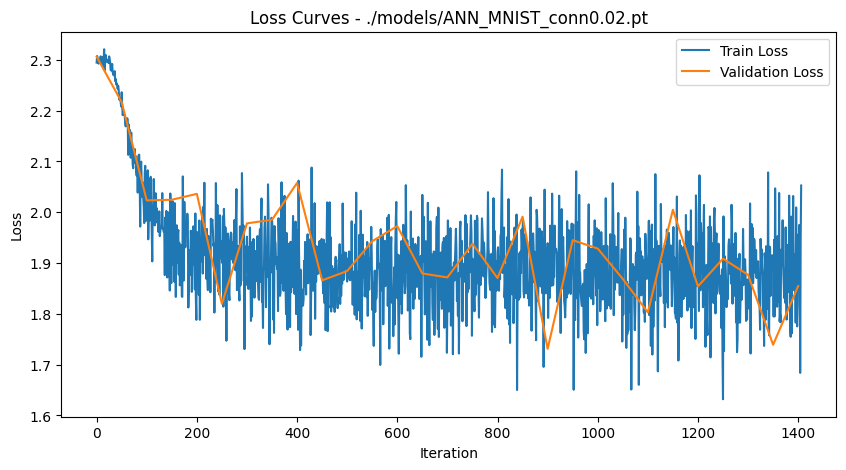

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 27.32%


Training progress::   0%|          | 0/1407 [00:00<?, ?it/s]

Iteration: 0
Training loss: 2.30
Validation loss: 2.31
Validation accuracy: 10.16%
Training accuracy: 7.03%
----------------
Iteration: 50
Training loss: 2.27
Validation loss: 2.29
Validation accuracy: 13.28%
Training accuracy: 23.44%
----------------
Iteration: 100
Training loss: 2.12
Validation loss: 2.11
Validation accuracy: 26.56%
Training accuracy: 22.66%
----------------
Iteration: 150
Training loss: 2.03
Validation loss: 2.05
Validation accuracy: 28.12%
Training accuracy: 25.78%
----------------
Iteration: 200
Training loss: 2.01
Validation loss: 2.07
Validation accuracy: 31.25%
Training accuracy: 25.78%
----------------
Iteration: 250
Training loss: 2.06
Validation loss: 1.94
Validation accuracy: 32.03%
Training accuracy: 28.91%
----------------
Iteration: 300
Training loss: 1.99
Validation loss: 1.98
Validation accuracy: 29.69%
Training accuracy: 32.81%
----------------
Iteration: 350
Training loss: 2.01
Validation loss: 2.07
Validation accuracy: 27.34%
Training accuracy: 28.1

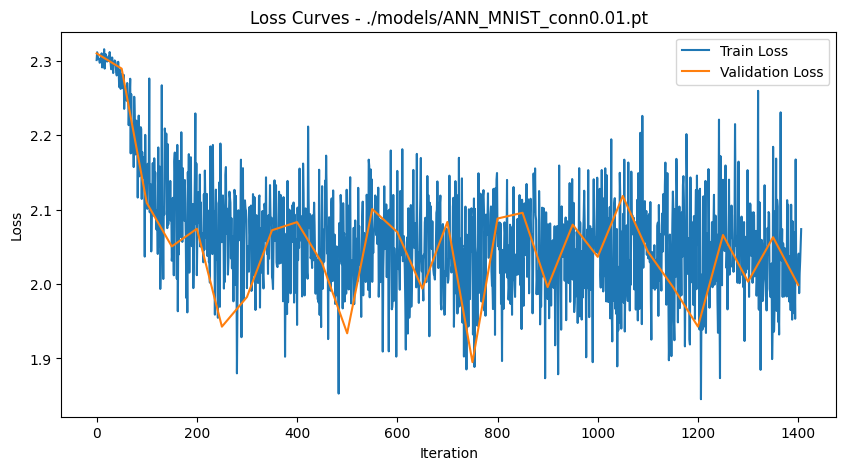

Testing progress::   0%|          | 0/79 [00:00<?, ?it/s]

Test Accuracy: 27.14%


In [2]:
model_path = "./models/ANN_MNIST.pt"
net = Net()
optimiser = torch.optim.Adam(net.parameters(),lr=lr,weight_decay=0)
gen_reset() #reset the PRNG generators for the random samplers so we consistently get the same sequence of samples for each experiment run
net = trainer(net,train_loader=train_loader,valid_loader=test_loader,model_path=model_path,optimiser=optimiser,epochs=3,deepr=False,device=device)
gen_reset()
baseline_accuracy = test_stats(net,test_loader=test_loader,device=device)
print("----")

connectivities = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01]

accuracies = []

for c in connectivities:
    model_path = "./models/ANN_MNIST_conn"+str(c)+".pt"
    net = Net(c)
    optimiser = torch.optim.Adam(net.parameters(),lr=lr,weight_decay=0)
    gen_reset()
    net = trainer(net,train_loader=train_loader,valid_loader=test_loader,model_path=model_path,optimiser=optimiser,epochs=3,deepr=True,device=device)
    gen_reset()
    a = test_stats(net,test_loader=test_loader,device=device)
    accuracies.append(a)

with open("./pickles/ANN_MNIST_baseline", "wb") as f:
    pickle.dump(baseline_accuracy,f)

with open("./pickles/ANN_MNIST_deepr_accuracies", "wb") as f:
    pickle.dump(accuracies,f)

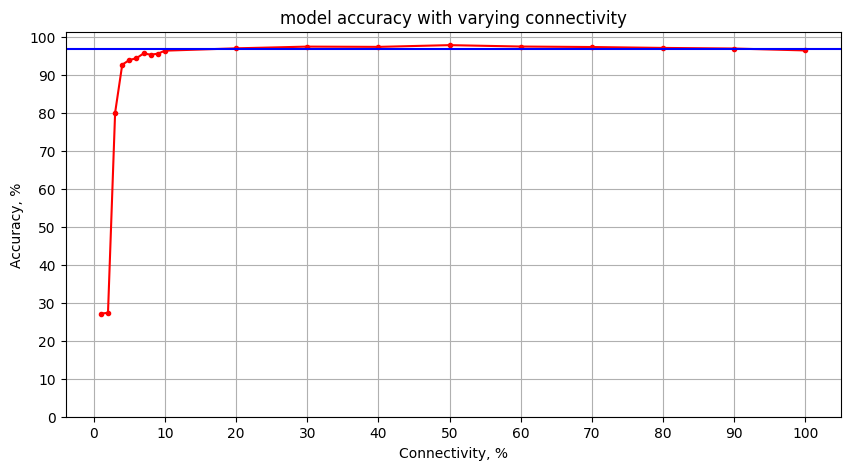

In [3]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot([c*100 for c in connectivities],[a*100 for a in accuracies],'.r-')
plt.axhline(y = baseline_accuracy*100, color = 'b', linestyle = '-')
plt.title("model accuracy with varying connectivity")
plt.xlabel("Connectivity, %")
plt.ylabel("Accuracy, %")
plt.xticks(range(0,101,10))
plt.yticks(range(0,101,10))
plt.grid(True)
plt.show()

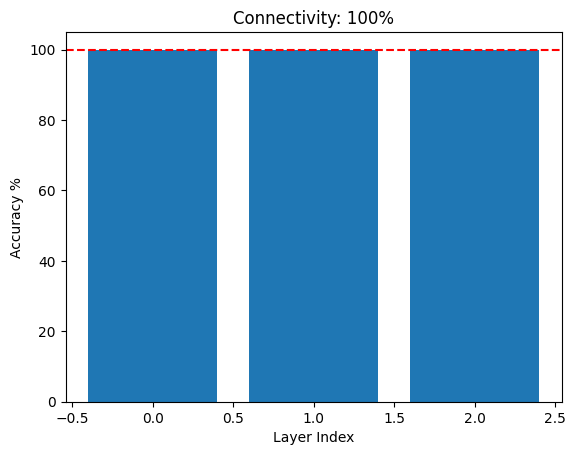

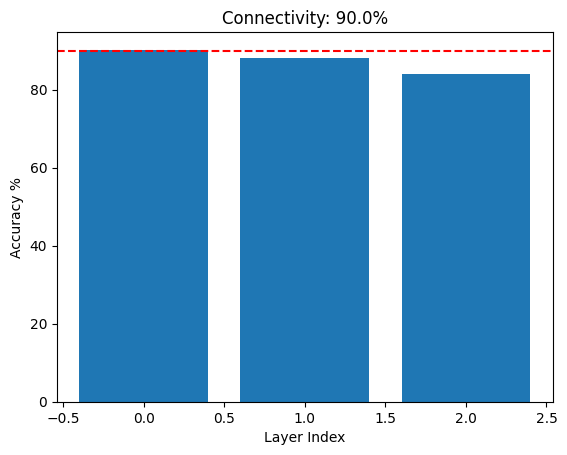

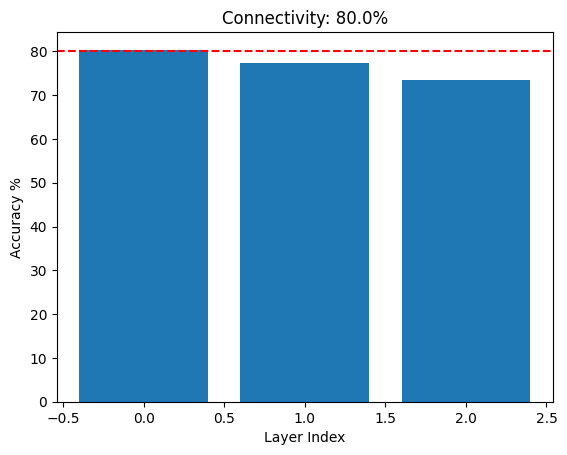

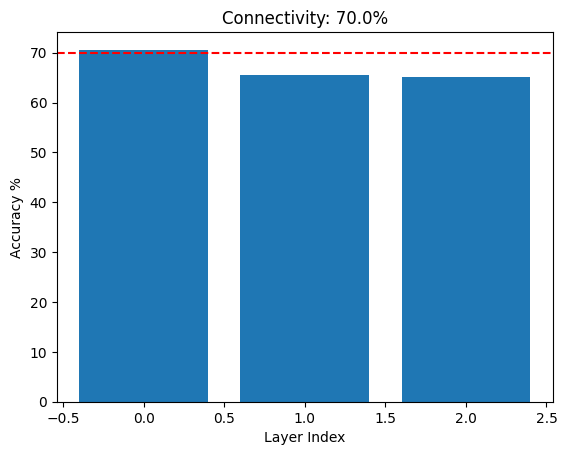

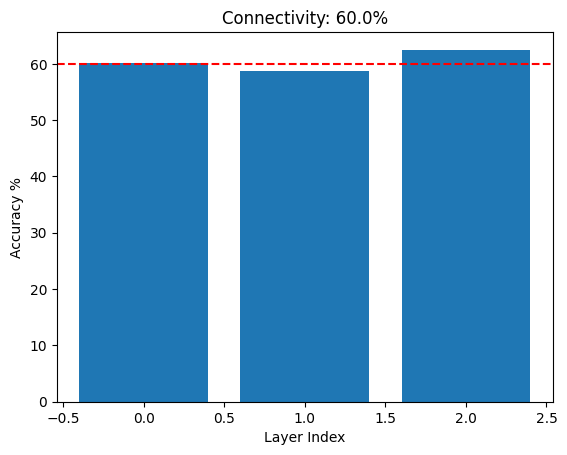

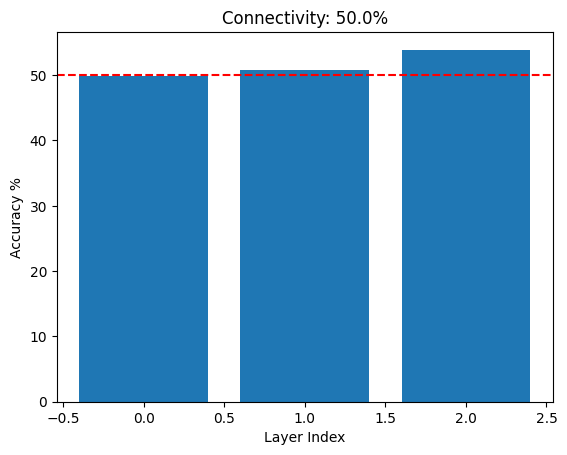

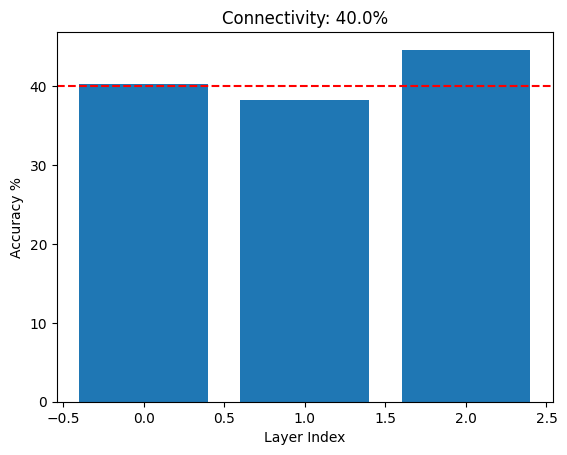

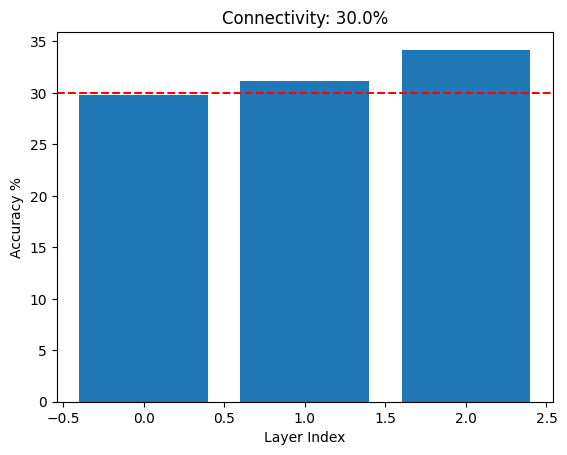

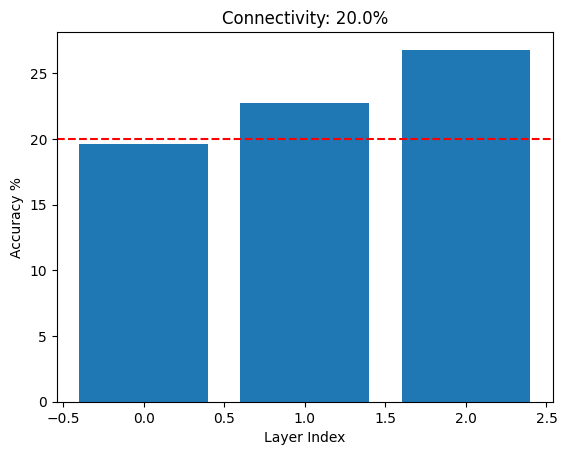

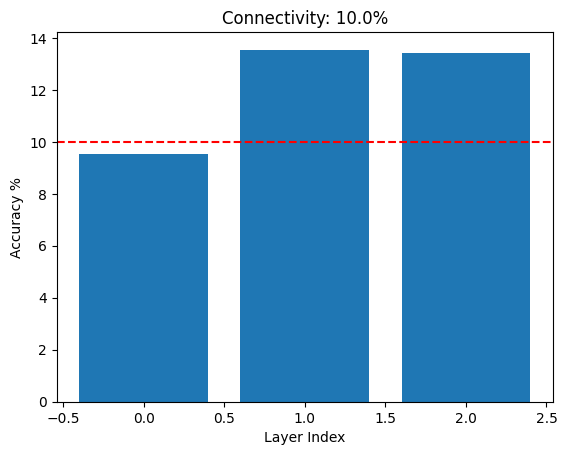

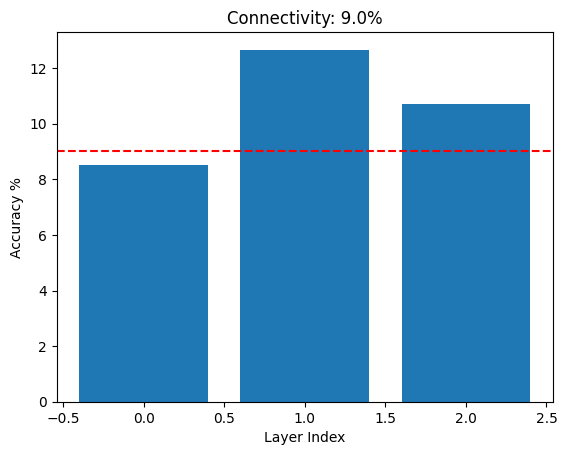

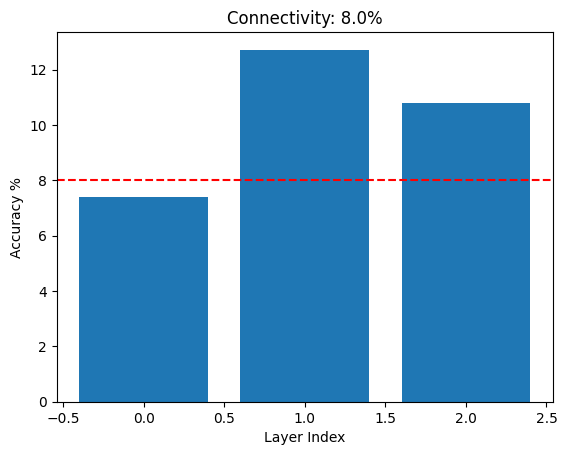

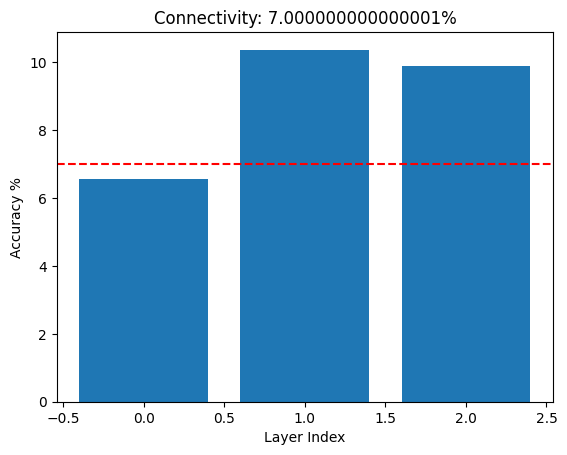

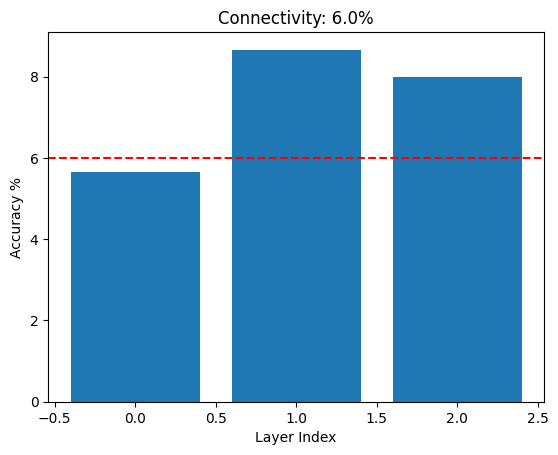

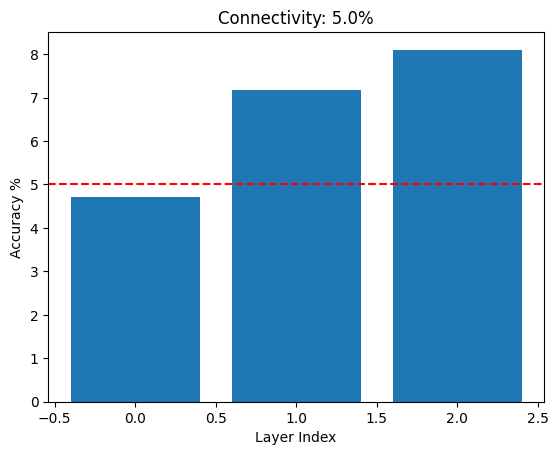

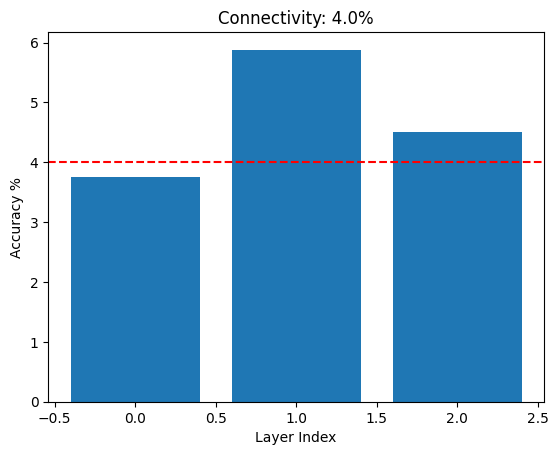

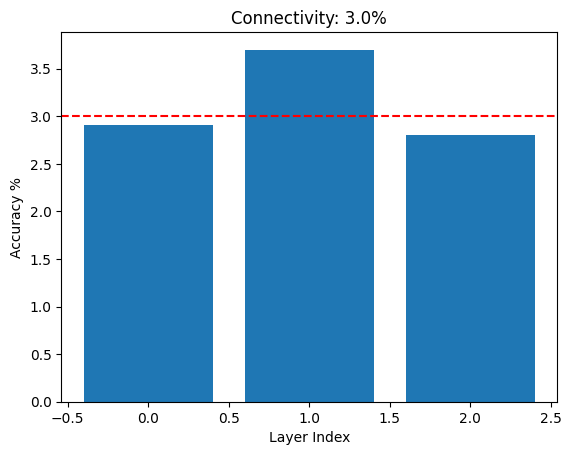

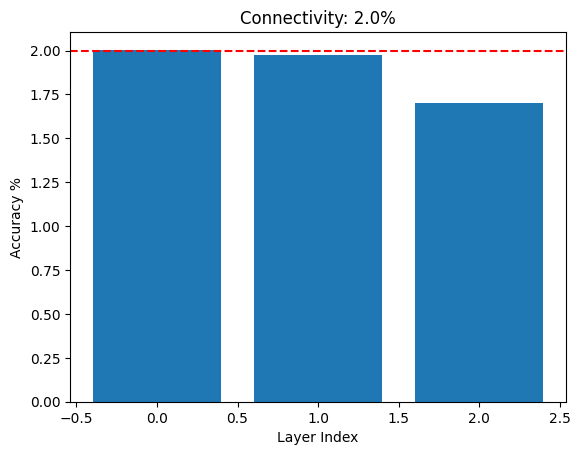

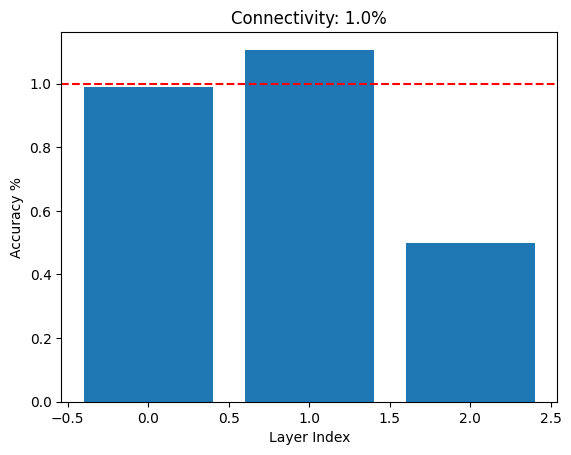

In [34]:
for c in connectivities:

    net = Net(1) #connectivity is irrelevant, after we load the model - deepr isnt saved to the model file (no time to fix + retrain & save new models), this is a hack
    net.load_state_dict(torch.load("models/ANN_MNIST_conn"+str(c)+".pt"))

    layer_connection_hist(net.deepr,c)
        